## Observations and Insights

## Dependencies and starter code

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets
from scipy.stats import linregress

# Study data files
mouse_metadata = "mouse_metadata.csv"
study_results = "study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var = merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv = merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary_df = pd.DataFrame({'Mean': mean,
                           'Median': median,
                           'Variance': var,
                           'Standard Deviation': stdv,
                           'SEM': sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

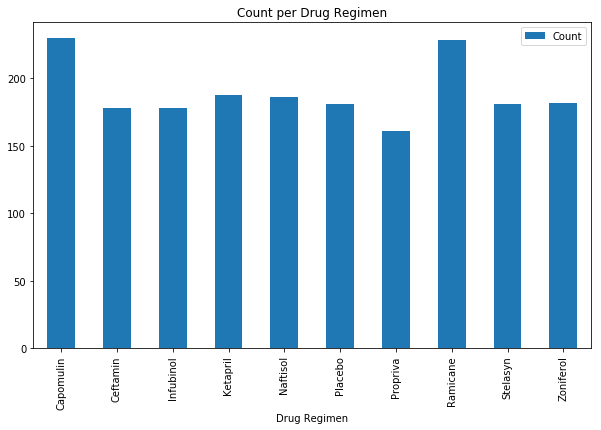

<Figure size 432x288 with 0 Axes>

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
grouped_df = pd.DataFrame(merge_df.groupby(['Drug Regimen']).count()).reset_index()
#Filter df
regimen_points = grouped_df[['Drug Regimen', 'Mouse ID']]
regimen_points = regimen_points.rename(columns={'Mouse ID': "Count"})
#set new index
regimen_points = regimen_points.set_index('Drug Regimen')
#plot datapoints
regimen_points.plot(kind='bar', figsize=(10,6))
plt.title("Count per Drug Regimen")
plt.show()
plt.tight_layout()

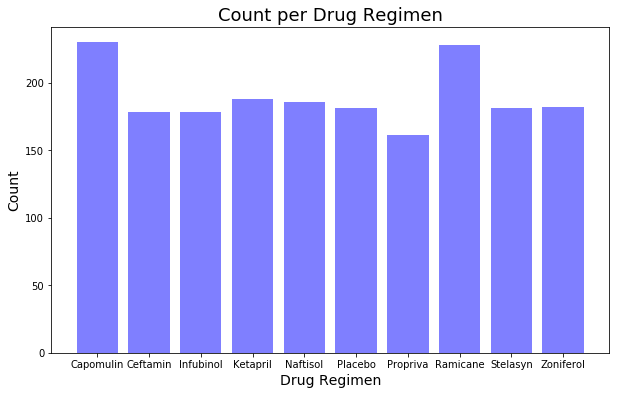

In [7]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
drug_regimen = summary_df.index.tolist()
regimen_count = (merge_df.groupby(['Drug Regimen'])['Age_months'].count()).tolist()
#plot bar graph
plt.figure(figsize=(10,6))
plt.bar(drug_regimen, regimen_count, color='b', alpha=0.5, align='center')
plt.title("Count per Drug Regimen", fontsize=18)
plt.xlabel('Drug Regimen', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

## Pie plots

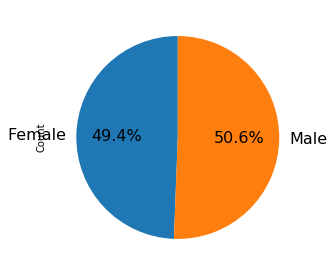

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = pd.DataFrame(merge_df.groupby(['Sex']).count()).reset_index()
gender_df = gender_df[['Sex', 'Mouse ID']]
gender_df = gender_df.rename(columns={'Mouse ID': 'Count'})

plt.figure(figsize=(10,6))
ax1 = plt.subplot(121, aspect='equal')
gender_df.plot(kind='pie', y='Count', ax=ax1, autopct='%1.1f%%',
              startangle=90, shadow=False, labels = gender_df['Sex'], legend=False, fontsize=16)

In [11]:
plt.clf()
plt.cla()
plt.close()

(-1.2101537272442933,
 1.1077121695699783,
 -1.1046567928362272,
 1.1022210380848285)

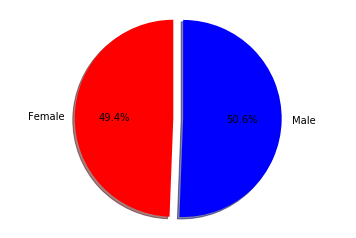

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = (merge_df.groupby(['Sex'])['Age_months'].count()).tolist()
labels = ['Female', 'Male']
colors = ['red', 'blue']
explode = (0.1, 0)
plt.pie(gender_count, explode=explode, labels=labels, colors=colors,
       autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

## Quartiles, outliers and boxplots

In [35]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
sorted_df = merge_df.sort_values(['Drug Regimen', 'Mouse ID', 'Timepoint'], ascending=True)
max_df = sorted_df.loc[sorted_df['Timepoint'] == 45]
max_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,309,b128,Capomulin,Female,9,22,45,38.982878,2
1,299,b742,Capomulin,Male,7,21,45,38.939633,0
2,244,g288,Capomulin,Male,3,19,45,37.074024,1
3,360,g316,Capomulin,Female,22,22,45,40.159220,2
4,440,i557,Capomulin,Female,1,24,45,47.685963,1


In [36]:
cap_data_df = max_df[max_df['Drug Regimen'].isin(['Capomulin'])]
cap_data_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,309,b128,Capomulin,Female,9,22,45,38.982878,2
1,299,b742,Capomulin,Male,7,21,45,38.939633,0
2,244,g288,Capomulin,Male,3,19,45,37.074024,1
3,360,g316,Capomulin,Female,22,22,45,40.159220,2
4,440,i557,Capomulin,Female,1,24,45,47.685963,1


In [38]:
cap_list = cap_data_df.sort_values(['Tumor Volume (mm3)'], ascending=True).reset_index()
cap_list = cap_list['Tumor Volume (mm3)']

In [40]:
quartiles = cap_list.quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The the median of temperatures is: 37.31184577 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


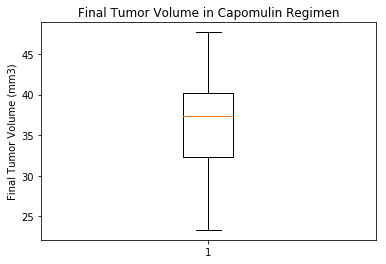

In [41]:
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Capomulin Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(cap_list)
plt.show()

In [42]:
ram_data_df = max_df[max_df['Drug Regimen'].isin(['Ramicane'])]
ram_data_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,327,a411,Ramicane,Male,3,22,45,38.407618,1
1,430,a444,Ramicane,Female,10,25,45,43.047543,0
2,214,a520,Ramicane,Male,13,21,45,38.810366,1
3,174,a644,Ramicane,Female,7,17,45,32.978522,1
4,154,c758,Ramicane,Male,9,17,45,33.397653,1


In [43]:
ram_list = ram_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ram_list = ram_list["Tumor Volume (mm3)"]

In [44]:
quartiles = ram_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 30.981175224999998
The upper quartile of temperatures is: 38.508305307499995
The interquartile range of temperatures is: 7.527130082499998
The the median of temperatures is: 34.848627300000004 
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.


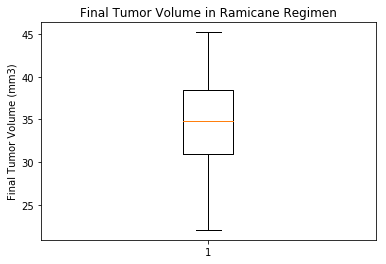

In [46]:
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Ramicane Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(ram_list)
plt.show()

In [47]:
inf_data_df = max_df[max_df['Drug Regimen'].isin(['Infubinol'])]
inf_data_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,463,a203,Infubinol,Female,20,23,45,67.973419,2
1,473,a251,Infubinol,Female,21,25,45,65.525743,1
2,540,a685,Infubinol,Male,8,30,45,66.083066,3
3,637,c139,Infubinol,Male,11,28,45,72.226731,2
4,800,e476,Infubinol,Male,23,26,45,62.435404,1


In [48]:
inf_list = inf_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
inf_list = inf_list["Tumor Volume (mm3)"]

In [49]:
quartiles = inf_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 62.75445141
The upper quartile of temperatures is: 67.68556862
The interquartile range of temperatures is: 4.9311172099999965
The the median of temperatures is: 66.08306589 
Values below 55.35777559500001 could be outliers.
Values above 75.08224443499999 could be outliers.


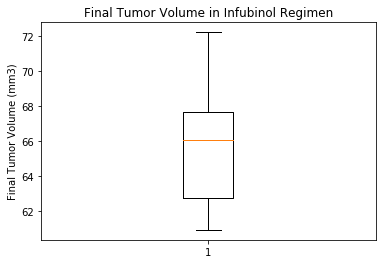

In [50]:
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Infubinol Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(inf_list)
plt.show()

In [51]:
cef_data_df = max_df[max_df['Drug Regimen'].isin(['Ceftamin'])]
cef_data_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,493,a275,Ceftamin,Female,20,28,45,62.999356,3
1,993,j296,Ceftamin,Female,24,30,45,61.849023,3
2,1033,k210,Ceftamin,Male,15,28,45,68.923185,3
3,1112,l471,Ceftamin,Female,7,28,45,67.748662,1
4,1132,l661,Ceftamin,Male,18,26,45,59.851956,3


In [52]:
cef_list = cef_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
cef_list = cef_list["Tumor Volume (mm3)"]

In [53]:
quartiles = cef_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 61.43389223
The upper quartile of temperatures is: 67.52748237
The interquartile range of temperatures is: 6.093590140000003
The the median of temperatures is: 64.29983003 
Values below 52.29350701999999 could be outliers.
Values above 76.66786758 could be outliers.


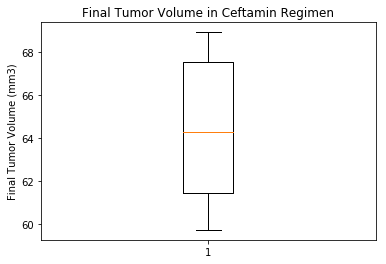

In [54]:
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume in Ceftamin Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(cef_list)
plt.show()

In [57]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
import plotly.graph_objects as go
import plotly.offline as pyo
trace0 = go.Box(y = cap_list, name = "Capomulin")
trace1 = go.Box(y = ram_list, name = "Ramicane")
trace2 = go.Box(y = inf_list, name = "Infubinol")
trace3 = go.Box(y = cef_list, name = "Ceftamin")

In [58]:
data = [trace0, trace1, trace2, trace3]
layout = go.Layout(title = "Final tumor volume for the four most promising treatment regimens")

In [59]:
fig = go.Figure(data=data, layout=layout)

pyo.plot(fig)

'temp-plot.html'

## Line and scatter plots

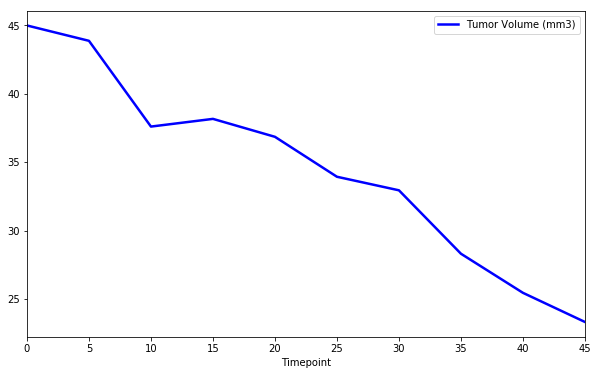

In [22]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = merge_df.loc[merge_df['Drug Regimen'] == 'Capomulin']
capomulin_df = capomulin_df.reset_index()

cap_single_df = capomulin_df.loc[capomulin_df['Mouse ID'] == 's185']

cap_single_df = cap_single_df.loc[:, ['Timepoint', 'Tumor Volume (mm3)']]

cap_single_df = cap_single_df.reset_index(drop=True)
cap_single_df.set_index('Timepoint').plot(figsize=(10,6), linewidth=2.5, color='b', xlim=(0,45))

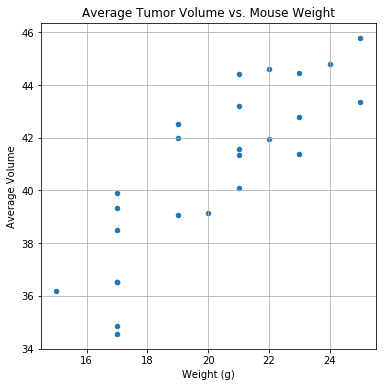

In [34]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
reduce_df = capomulin_df.loc[:, ['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)']]
average_cap = pd.DataFrame(reduce_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
average_cap = average_cap.rename(columns={'Tumor Volume (mm3)': 'Average Volume'})

average_cap = average_cap.set_index('Mouse ID')

average_cap.plot(kind='scatter', x='Weight (g)', y='Average Volume', grid=True, figsize=(6,6), title='Average Tumor Volume vs. Mouse Weight')
plt.show()

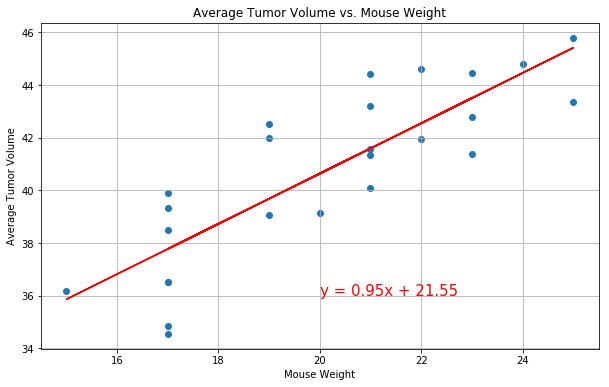

In [33]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = average_cap.iloc[:,0]
avg_tumor_volume = average_cap.iloc[:,1]
correlation = st.pearsonr(mouse_weight, avg_tumor_volume)

x_values = average_cap['Weight (g)']
y_values = average_cap['Average Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))

plt.figure(figsize=(10,6))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (20,36), fontsize=15, color='r')
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.title('Average Tumor Volume vs. Mouse Weight')
plt.grid()
plt.show()